In [1]:
# Filter tensorflow version warnings
import os
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
import gym
from stable_baselines.common.policies import CnnPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

In [3]:
## DEFAULT environment values

ACT = [[0, 0, 0], [-1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 0.8]]
# discrete actions: center_steering and no gas/brake, left, right, accel, brake  
#     --> actually a good choice, because car_dynamics softens the action's diff for gas and steering

##REWARDS 
# reward given each step: step, distance to centerline, speed, steer angle
# reward given on new tile: % of advance
# reward given at episode end: finished, patience exceeded, out of bounds, steps exceeded
GYM_REWARD = [-0.1, 0.0, 0.0, 0.0, 10.0, 0,  -0,  -100, -0]
STD_REWARD = [-0.1, 0.0, 0.0, 0.0, 1.0, 100, -20, -100, -50]
# see docu for reward computation details

env1 = gym.make('CarRacing-v2',
        use_track = 1,           # number of times to use the same track, [1-100]. More than 20 high risk of overfitting!!
        episodes_per_track = 1,  # number of evenly distributed starting points on each track [1-20]
        discre = ACT,            # Action discretization function, None for continous
        tr_complexity = 12,      # generated track geometric complexity, [6-20]
        tr_width = 40,           # relative track width, [30-50]
        patience = 2,            # Max time in secs without progress, [0.5-10]
        indicators = True,       # Show or not bottom info panel
        game_color = 0,          # State color option: 0 = RGB, 1 = Grayscale, 2 = Green only
        frames_per_state = 1,    # stacked (history) frames on each state [1-inf]
        skip_frames = 0,         # number of frames to skip on history, latest observation always on first frame [0-4]
        f_reward = STD_REWARD,   # reward funtion coeficients, refer to Docu for details
        verbose = 1      )


In [4]:
print(env1.action_space)
print(env1.observation_space)
env1.metadata

Discrete(5)
Box(0, 255, (96, 96, 3), uint8)


{'render.modes': ['human', 'rgb_array', 'state_pixels'],
 'FPS, 1/timebase': 33.333333333333336,
 'Zoom_level': 1.7,
 'Flight start': False,
 'show_track_1st': False,
 'state_pixels frame size': [96, 96]}

In [5]:
batch_size=256
updates=100
epochs=4

model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch_size, 
             gamma=0.995, learning_rate=0.001, nminibatches=epochs) #, seed=314, n_cpu_tf_sess=1)

model.learn(total_timesteps=updates*batch_size)


Wrapping the env in a DummyVecEnv.
Track generation: 1080..1353 -> 273-tiles track, complex 12
1  cut by time without progress. Steps 67  %advance 0.7  played reward -6.59  last penalty -20
Track generation: 991..1241 -> 250-tiles track, complex 12
------------------------------------
| approxkl           | 0.007202763 |
| clipfrac           | 0.15820312  |
| explained_variance | 0.00444     |
| fps                | 41          |
| n_updates          | 1           |
| policy_entropy     | 1.6022024   |
| policy_loss        | -0.0175873  |
| serial_timesteps   | 256         |
| time_elapsed       | 0           |
| total_timesteps    | 256         |
| value_loss         | 10.46107    |
------------------------------------
-------------------------------------
| approxkl           | 0.005843168  |
| clipfrac           | 0.08496094   |
| explained_variance | 0.0671       |
| fps                | 47           |
| n_updates          | 2            |
| policy_entropy     | 1.5918505    |
| po

--------------------------------------
| approxkl           | 0.0072838473  |
| clipfrac           | 0.111328125   |
| explained_variance | 0.539         |
| fps                | 62            |
| n_updates          | 14            |
| policy_entropy     | 1.5009618     |
| policy_loss        | -0.0052926447 |
| serial_timesteps   | 3584          |
| time_elapsed       | 67.4          |
| total_timesteps    | 3584          |
| value_loss         | 0.36351746    |
--------------------------------------
1  cut by time without progress. Steps 370  %advance 6.8  played reward -30.76  last penalty -20
Track generation: 908..1138 -> 230-tiles track, complex 12
-------------------------------------
| approxkl           | 0.0030997265 |
| clipfrac           | 0.009765625  |
| explained_variance | 0.287        |
| fps                | 53           |
| n_updates          | 15           |
| policy_entropy     | 1.4236088    |
| policy_loss        | 0.0015650282 |
| serial_timesteps   | 3840      

--------------------------------------
| approxkl           | 0.003015025   |
| clipfrac           | 0.0126953125  |
| explained_variance | 0.887         |
| fps                | 55            |
| n_updates          | 25            |
| policy_entropy     | 1.3442285     |
| policy_loss        | -0.0026434276 |
| serial_timesteps   | 6400          |
| time_elapsed       | 117           |
| total_timesteps    | 6400          |
| value_loss         | 1.395777      |
--------------------------------------
1  cut by time without progress. Steps 186  %advance 5.8  played reward -13.23  last penalty -20
Track generation: 1104..1383 -> 279-tiles track, complex 12
---------------------------------------
| approxkl           | 0.004505964    |
| clipfrac           | 0.045898438    |
| explained_variance | 0.922          |
| fps                | 59             |
| n_updates          | 26             |
| policy_entropy     | 1.3614706      |
| policy_loss        | -0.00058580714 |
| serial_timeste

1  cut by time without progress. Steps 242  %advance 5.6  played reward -19.23  last penalty -20
Track generation: 1085..1359 -> 274-tiles track, complex 12
--------------------------------------
| approxkl           | 0.0066121286  |
| clipfrac           | 0.111328125   |
| explained_variance | 0.937         |
| fps                | 52            |
| n_updates          | 37            |
| policy_entropy     | 1.4628989     |
| policy_loss        | -0.0004493941 |
| serial_timesteps   | 9472          |
| time_elapsed       | 172           |
| total_timesteps    | 9472          |
| value_loss         | 0.83858377    |
--------------------------------------
1  cut by time without progress. Steps 393  %advance 5.4  played reward -34.43  last penalty -20
Track generation: 1148..1438 -> 290-tiles track, complex 12
-------------------------------------
| approxkl           | 0.022544265  |
| clipfrac           | 0.40234375   |
| explained_variance | 0.349        |
| fps                | 60  

1  cut by time without progress. Steps 335  %advance 5.0  played reward -29.18  last penalty -20
Track generation: 992..1243 -> 251-tiles track, complex 12
-------------------------------------
| approxkl           | 0.0069366638 |
| clipfrac           | 0.10449219   |
| explained_variance | 0.547        |
| fps                | 54           |
| n_updates          | 49           |
| policy_entropy     | 1.5249714    |
| policy_loss        | -0.009328704 |
| serial_timesteps   | 12544        |
| time_elapsed       | 228          |
| total_timesteps    | 12544        |
| value_loss         | 0.5810542    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0057722246  |
| clipfrac           | 0.10546875    |
| explained_variance | 0.948         |
| fps                | 56            |
| n_updates          | 50            |
| policy_entropy     | 1.5070049     |
| policy_loss        | -0.0048331874 |
| serial_timesteps   | 12800         |

-------------------------------------
| approxkl           | 0.0150955245 |
| clipfrac           | 0.2734375    |
| explained_variance | 0.0233       |
| fps                | 52           |
| n_updates          | 62           |
| policy_entropy     | 1.4998851    |
| policy_loss        | -0.013980145 |
| serial_timesteps   | 15872        |
| time_elapsed       | 286          |
| total_timesteps    | 15872        |
| value_loss         | 0.70900965   |
-------------------------------------
---------------------------------------
| approxkl           | 0.004156634    |
| clipfrac           | 0.055664062    |
| explained_variance | 0.457          |
| fps                | 57             |
| n_updates          | 63             |
| policy_entropy     | 1.5012597      |
| policy_loss        | -2.0082225e-05 |
| serial_timesteps   | 16128          |
| time_elapsed       | 290            |
| total_timesteps    | 16128          |
| value_loss         | 0.46368012     |
--------------------------

--------------------------------------
| approxkl           | 0.007692449   |
| clipfrac           | 0.11230469    |
| explained_variance | 0.965         |
| fps                | 53            |
| n_updates          | 76            |
| policy_entropy     | 1.3987749     |
| policy_loss        | -0.0052270833 |
| serial_timesteps   | 19456         |
| time_elapsed       | 349           |
| total_timesteps    | 19456         |
| value_loss         | 0.27964872    |
--------------------------------------
1  cut by time without progress. Steps 282  %advance 4.7  played reward -23.98  last penalty -20
Track generation: 1040..1303 -> 263-tiles track, complex 12
--------------------------------------
| approxkl           | 0.00959274    |
| clipfrac           | 0.18359375    |
| explained_variance | 0.932         |
| fps                | 47            |
| n_updates          | 77            |
| policy_entropy     | 1.3808508     |
| policy_loss        | -0.0073261596 |
| serial_timesteps   | 1

1  cut by time without progress. Steps 154  %advance 8.1  played reward -7.96  last penalty -20
Track generation: 1016..1273 -> 257-tiles track, complex 12
-------------------------------------
| approxkl           | 0.0046235616 |
| clipfrac           | 0.080078125  |
| explained_variance | 0.976        |
| fps                | 55           |
| n_updates          | 88           |
| policy_entropy     | 0.90874904   |
| policy_loss        | 0.0034960094 |
| serial_timesteps   | 22528        |
| time_elapsed       | 405          |
| total_timesteps    | 22528        |
| value_loss         | 1.0268712    |
-------------------------------------
1  cut by time without progress. Steps 144  %advance 7.0  played reward -8.04  last penalty -20
Track generation: 1124..1408 -> 284-tiles track, complex 12
1  cut by time without progress. Steps 137  %advance 6.0  played reward -8.29  last penalty -20
Track generation: 1252..1568 -> 316-tiles track, complex 12
--------------------------------------

1  cut by time without progress. Steps 130  %advance 7.6  played reward -5.97  last penalty -20
Track generation: 1209..1514 -> 305-tiles track, complex 12
------------------------------------
| approxkl           | 0.033693377 |
| clipfrac           | 0.095703125 |
| explained_variance | 0.864       |
| fps                | 59          |
| n_updates          | 98          |
| policy_entropy     | 0.3678118   |
| policy_loss        | 0.015722083 |
| serial_timesteps   | 25088       |
| time_elapsed       | 450         |
| total_timesteps    | 25088       |
| value_loss         | 0.827434    |
------------------------------------
1  cut by time without progress. Steps 227  %advance 8.8  played reward -14.7  last penalty -20
Track generation: 1124..1408 -> 284-tiles track, complex 12
1  cut by time without progress. Steps 125  %advance 6.3  played reward -6.74  last penalty -20
Track generation: 1132..1424 -> 292-tiles track, complex 12
-------------------------------------
| approxkl   

In [6]:
import pickle

model.save("ppo2_pab_4f3s_gray_bs256_indic", cloudpickle=True)
#param_list=model.get_parameter_list()
param = model.get_parameters()

f = open("ppo2_cnn_agentI_param.pkl","wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [7]:
# Enjoy trained agent

#obs=env1.reset()  # uses the last trainig track!
obs=env1.reset_track()  # creates new random track

done = False
pasos = 0
_states=None

while not done and pasos<1002:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env1.step(action)
    env1.render()
    pasos+=1


Track generation: 992..1243 -> 251-tiles track, complex 12
1  cut by time without progress. Steps 120  %advance 7.2  played reward -5.49  last penalty -20


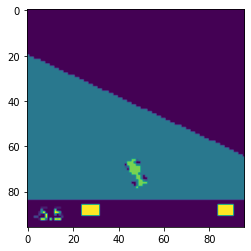

In [8]:
import matplotlib.pyplot as plt
plt.imshow(obs[:,:,0])


In [9]:
env1.close()